In [22]:
# Dependencies
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

In [2]:
# Name of the CSV file
file = '../Resources/FINAL_CLEAN_FILE.csv'

In [3]:
data = pd.read_csv(file)

In [4]:
data

,VAERS_ID,SYMPTOM,ASSIGNED_GROUP,SEVERITY_LEVEL,HOSPITAL,AGE_YRS,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES,F,M,JANSSEN,MODERNA,PFIZER,VAX_DOSE_SERIES_1,VAX_DOSE_SERIES_2,VAX_SITE_LA,VAX_SITE_RA
0,916600,Dysphagia,Difficulty swallowing,MILD,0.0,33.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,917168,Dysphagia,Difficulty swallowing,MILD,0.0,64.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,918386,Dysphagia,Difficulty swallowing,MILD,0.0,62.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,918393,Dysphagia,Difficulty swallowing,MILD,0.0,62.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,918479,Dysphagia,Difficulty swallowing,MILD,0.0,37.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134250,1101143,Asthmatic crisis,Respiratory distress,MODERATE,0.0,29.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
134251,1101143,Asthmatic crisis,Respiratory distress,MODERATE,0.0,29.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
134252,1101143,Asthmatic crisis,Respiratory distress,MODERATE,0.0,29.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
134253,1101143,Asthmatic crisis,Respiratory distress,MODERATE,0.0,29.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [5]:
data.groupby(['SEVERITY_LEVEL']).count()

,VAERS_ID,SYMPTOM,ASSIGNED_GROUP,HOSPITAL,AGE_YRS,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES,F,M,JANSSEN,MODERNA,PFIZER,VAX_DOSE_SERIES_1,VAX_DOSE_SERIES_2,VAX_SITE_LA,VAX_SITE_RA
SEVERITY_LEVEL,,,,,,,,,,,,,,,,,,,
MILD,120630,120630,120630,120630,120630,120630,120630,120630,120630,120630,120630,120630,120630,120630,120630,120630,120630,120630,120630
MODERATE,10195,10195,10195,10195,10195,10195,10195,10195,10195,10195,10195,10195,10195,10195,10195,10195,10195,10195,10195
SEVERE,3430,3430,3430,3430,3430,3430,3430,3430,3430,3430,3430,3430,3430,3430,3430,3430,3430,3430,3430


In [6]:
X = data.drop(['VAERS_ID', 'SYMPTOM','ASSIGNED_GROUP','SEVERITY_LEVEL','HOSPITAL'], axis=1)
X

,AGE_YRS,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES,F,M,JANSSEN,MODERNA,PFIZER,VAX_DOSE_SERIES_1,VAX_DOSE_SERIES_2,VAX_SITE_LA,VAX_SITE_RA
0,33.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,64.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,62.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,62.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,37.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134250,29.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
134251,29.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
134252,29.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
134253,29.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [7]:
y = LabelEncoder().fit_transform(data['SEVERITY_LEVEL'])
y

array([0, 0, 0, ..., 1, 1, 1])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9240150559632936
Testing Score: 0.9125849124061495


In [11]:
features = clf.feature_importances_

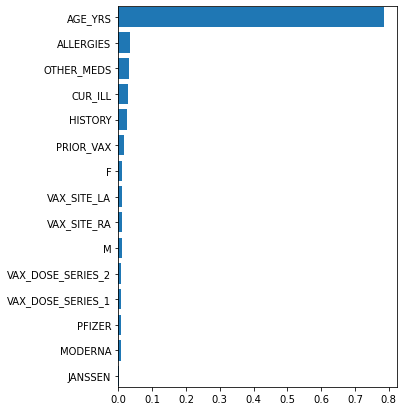

In [12]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(5,7)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [13]:
clf = DecisionTreeClassifier().fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[29715,   286,    90],
       [ 1902,   663,    22],
       [  572,    57,   257]], dtype=int64)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     30091
           1       0.66      0.26      0.37      2587
           2       0.70      0.29      0.41       886

    accuracy                           0.91     33564
   macro avg       0.76      0.51      0.58     33564
weighted avg       0.90      0.91      0.89     33564



In [15]:
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9240150559632936
Testing Score: 0.912733881539745


# Bagging

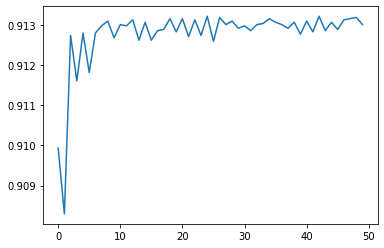

score: 0.9130020259802168


In [23]:
clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9240051245890893
Testing Score: 0.9123167679656775


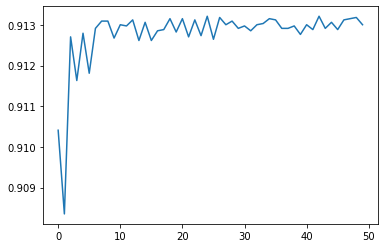

score: 0.9130020259802168


In [25]:
clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a random decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(splitter='random', random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')

In [26]:
clf = ExtraTreesClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9240150559632936
Testing Score: 0.912733881539745


In [27]:
y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict)*100)

89.65260398045525
